In [1]:
import generaluse as gu
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Visualización de imágenes

In [2]:
folder_name = 'preprodata'

dictionary = gu.getImgNamesAndPaths(folder_name)

list_filenames = list(dictionary.keys())
list_filepaths = [*dictionary.values()]

list_data = []
for name, path in zip(list_filenames,list_filepaths):
    data = dict()
    data["Filename"] = name
    data["Filepath"] = path
    list_data.append(data)

dataframe = pd.DataFrame(data=list_data)
dataframe

,Filename,Filepath
0,pp-frb-001.jpg,preprodata/pp-frb-001.jpg
1,pp-frb-002.jpg,preprodata/pp-frb-002.jpg
2,pp-frb-003.jpg,preprodata/pp-frb-003.jpg
3,pp-frb-004.jpg,preprodata/pp-frb-004.jpg
4,pp-frb-005.jpg,preprodata/pp-frb-005.jpg


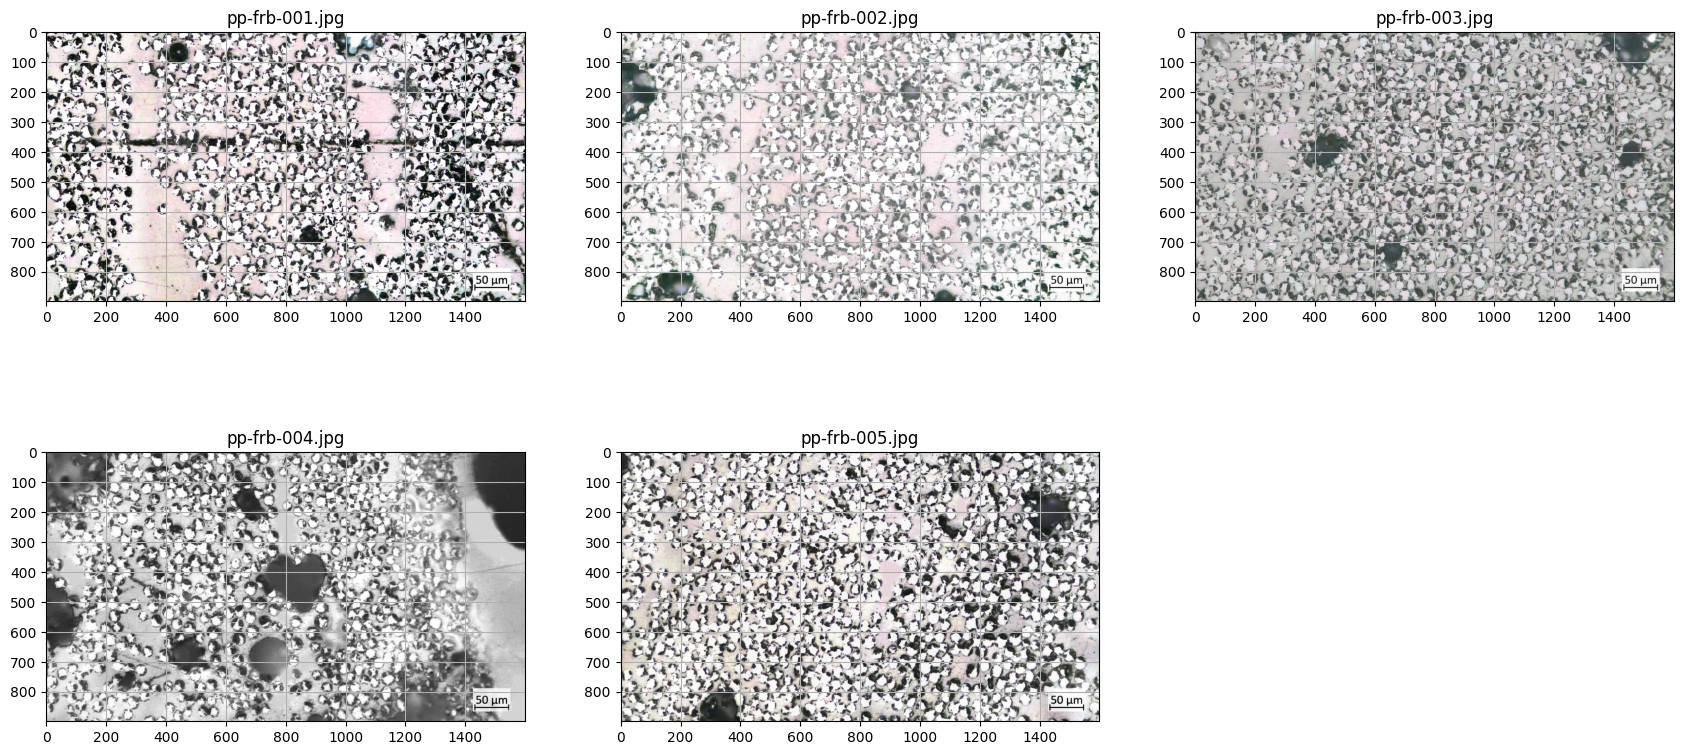

In [3]:
list_imgs = gu.getImagesFromPathfile(list_filepaths)
gu.plotFigures(list_filenames,list_imgs)

In [4]:
list_bubbles_coordinates = [
    [(80,420),(660,860),(880,1080)],
    [(200,80),(810,200),(200,950),(880,1080)],
    [(400,410),(750,650),(400,1450),(50,1480)],
    [(50,100),(550,70),(770,260),(680,480),(200,700),(400,800),(700,720),(870,1270),(100,1520)],
    [(50,10),(870,300),(200,1420)]
]

dataframe["BubbleCoor"] = list_bubbles_coordinates
dataframe

,Filename,Filepath,BubbleCoor
0,pp-frb-001.jpg,preprodata/pp-frb-001.jpg,"[(80, 420), (660, 860), (880, 1080)]"
1,pp-frb-002.jpg,preprodata/pp-frb-002.jpg,"[(200, 80), (810, 200), (200, 950), (880, 1080)]"
2,pp-frb-003.jpg,preprodata/pp-frb-003.jpg,"[(400, 410), (750, 650), (400, 1450), (50, 1480)]"
3,pp-frb-004.jpg,preprodata/pp-frb-004.jpg,"[(50, 100), (550, 70), (770, 260), (680, 480),..."
4,pp-frb-005.jpg,preprodata/pp-frb-005.jpg,"[(50, 10), (870, 300), (200, 1420)]"


## Visualización de histogramas de cada elemento

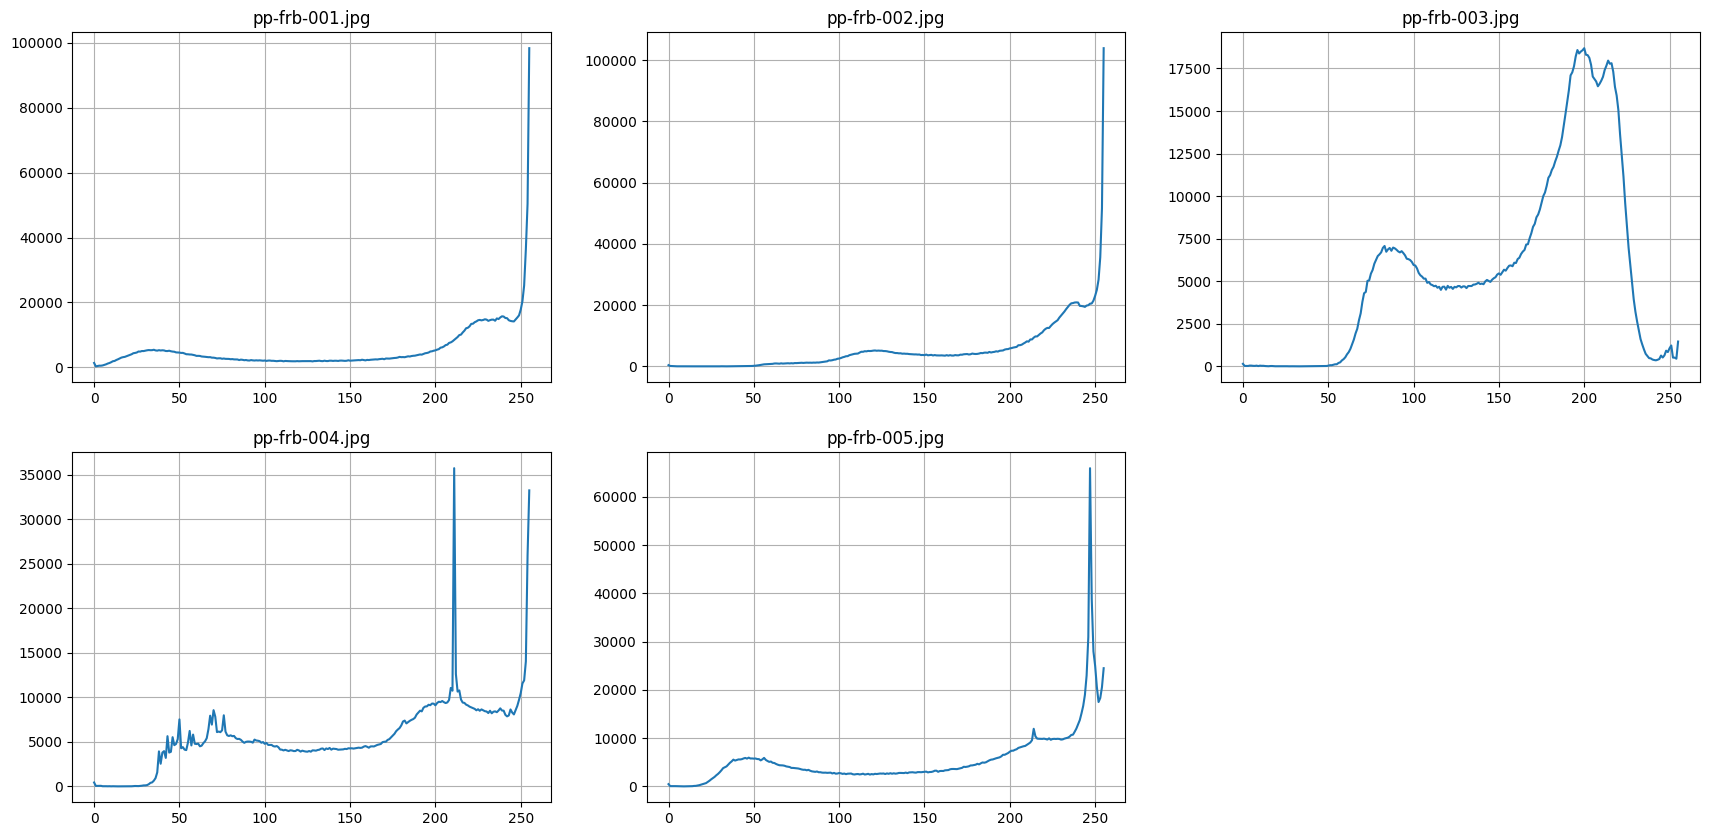

In [5]:
list_hist = []
for img in list_imgs:
    # Utilizo la capa verde porque es la que ofrece más gama de grises
    img_gch = img[:,:,1]
    
    hist = cv2.calcHist([img_gch], [0], None, [256], [0, 256])
    list_hist.append(hist)

gu.plotHist(list_filenames,list_hist)


In [6]:
list_graylevel_boundaries = [
    [120,250],
    [200,250],
    [120,210],
    [120,245],
    [120,245]
]

dataframe["GLBoundaries"] = list_graylevel_boundaries

dataframe

,Filename,Filepath,BubbleCoor,GLBoundaries
0,pp-frb-001.jpg,preprodata/pp-frb-001.jpg,"[(80, 420), (660, 860), (880, 1080)]","[120, 250]"
1,pp-frb-002.jpg,preprodata/pp-frb-002.jpg,"[(200, 80), (810, 200), (200, 950), (880, 1080)]","[200, 250]"
2,pp-frb-003.jpg,preprodata/pp-frb-003.jpg,"[(400, 410), (750, 650), (400, 1450), (50, 1480)]","[120, 210]"
3,pp-frb-004.jpg,preprodata/pp-frb-004.jpg,"[(50, 100), (550, 70), (770, 260), (680, 480),...","[120, 245]"
4,pp-frb-005.jpg,preprodata/pp-frb-005.jpg,"[(50, 10), (870, 300), (200, 1420)]","[120, 245]"


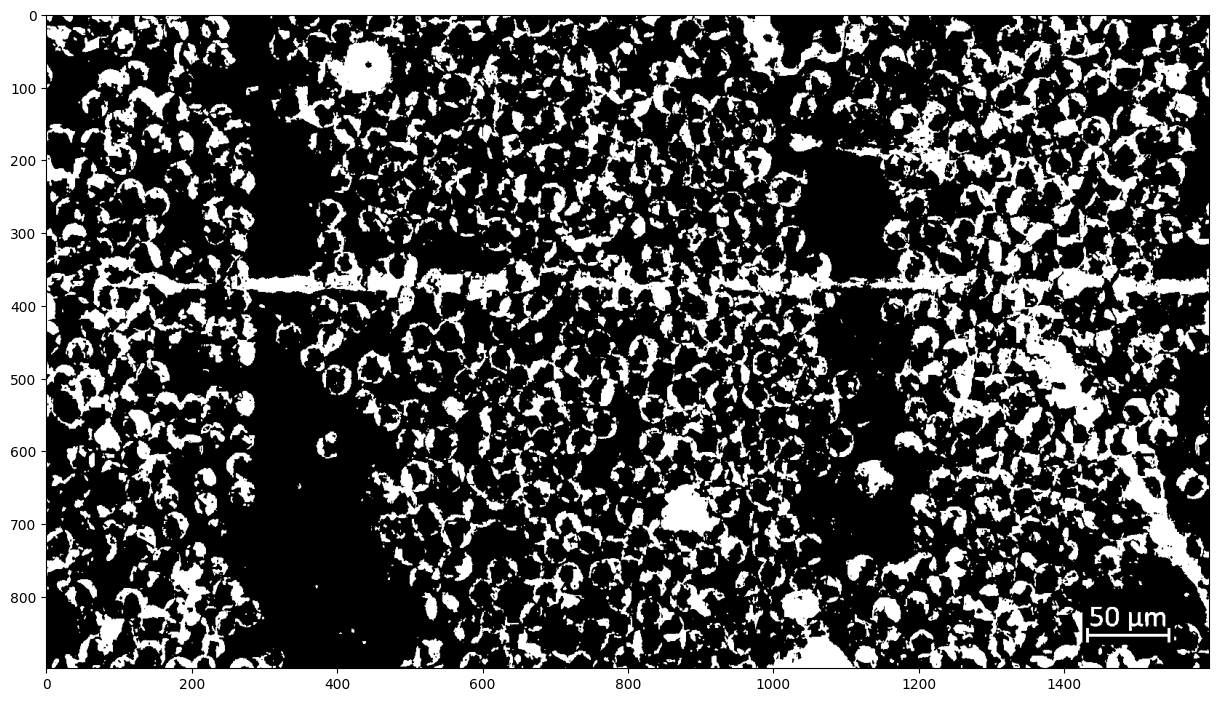

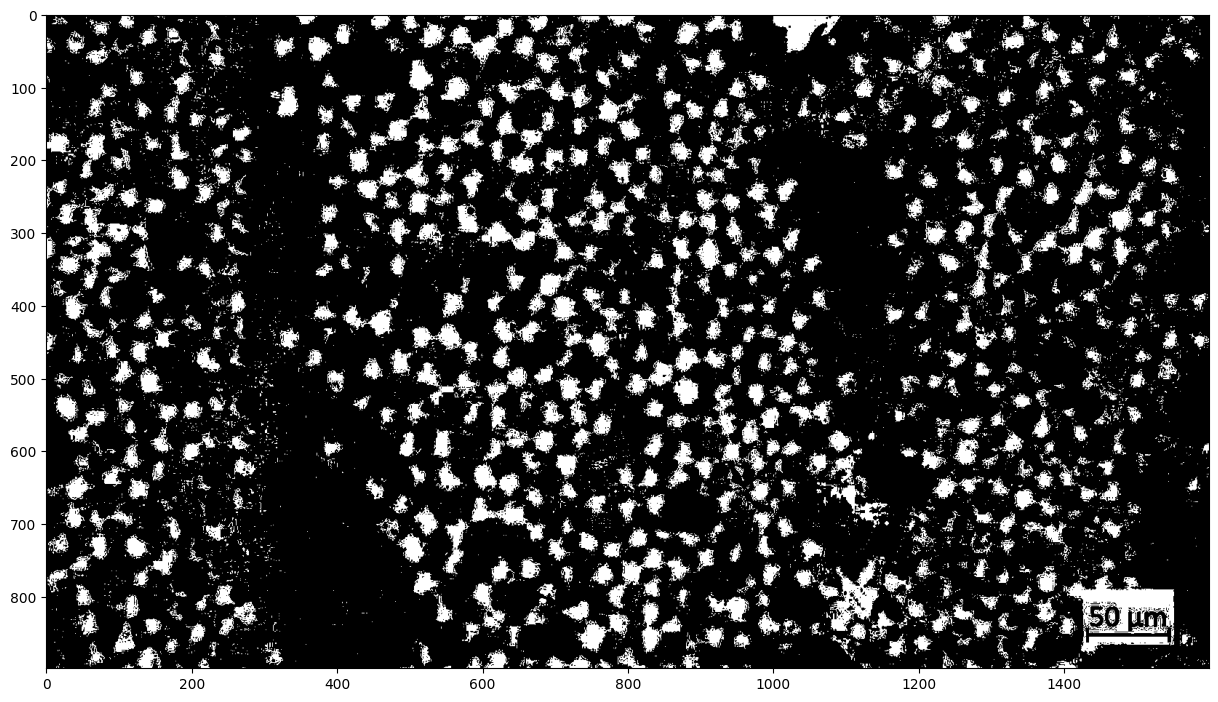

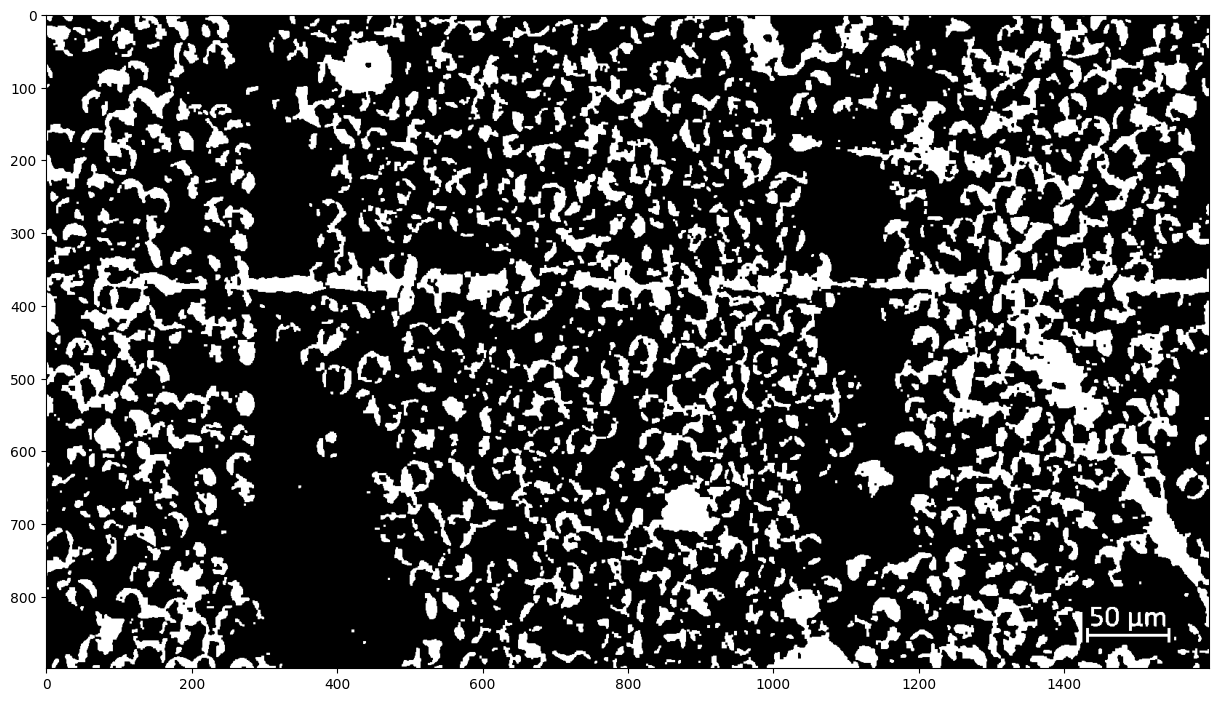

In [7]:
def getDegradedFiberWithBubbles(base_imgch,first_bound):
    img_degraded_fiber = base_imgch.copy()

    img_degraded_fiber[base_imgch < first_bound] = 255
    img_degraded_fiber[base_imgch >= first_bound] = 0

    return img_degraded_fiber

def getNotDegradedFiber(base_imgch,second_bound):
    img_not_degraded_fiber = base_imgch.copy()

    img_not_degraded_fiber[base_imgch < second_bound] = 0
    img_not_degraded_fiber[base_imgch >= second_bound] = 255

    return img_not_degraded_fiber

def applyClosing(base_img,kernel_size=3):
    kernel_cl = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size,kernel_size))
    closing = cv2.morphologyEx(base_img, cv2.MORPH_CLOSE, kernel_cl)

    return closing

def applyOpening(base_img,kernel_size=3):
    kernel_op = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size,kernel_size))
    opening = cv2.morphologyEx(base_img, cv2.MORPH_OPEN, kernel_op)

    return opening


test_1 = getDegradedFiberWithBubbles(list_imgs[0][:,:,1],list_graylevel_boundaries[0][0])
test_2 = getNotDegradedFiber(list_imgs[0][:,:,1],list_graylevel_boundaries[0][1])

test_3 = applyOpening(applyClosing(getDegradedFiberWithBubbles(list_imgs[0][:,:,1],list_graylevel_boundaries[0][0])))

fig = plt.figure(figsize=(15,15))
plt.imshow(test_1,cmap='gray')
plt.show()

fig = plt.figure(figsize=(15,15))
plt.imshow(test_2,cmap='gray')
plt.show()

fig = plt.figure(figsize=(15,15))
plt.imshow(test_3,cmap='gray')
plt.show()